In [117]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

import gc

### Visual Analytics Pipeline 



## Loop 1
### Hypothesis Made 

#### View, Subscribers and Uploads Based -
1. Hypthesis 1: Subscribers are more correlated to some
factors like Views and categories and not to factors like
Uploads.
2. Hypothesis 2: The Average Number of Subscribers and
Views for the older channels would be more than that of
the newer channels. At the same time, because the newer
channels have to have gathered a lot of subscribers quickly
to reach the top 1000, their number of Daily Subscribers and
Views would be greater.

#### Unemployment Rate - 
1. Hypothesis 1: Countries like USA, Brazil, and Spain have high unemployment
rates. However on a detailed scan Jordan is actually the country with the most unemployment rate.
2. Hypothesis 2: Countries with a high unemployment rate have more channels in Entertainment and
Music with Music comprising a considerable chunk in the top 5 countries ordered by unemployment.Along with this countries with
a higher unemployment rate have a very strong preference for watching sports followed by music, film and animation, and
gaming.

#### Education and Enrollment - 
1. People with high tertiary enrollment prefer watching Entertainment, Music, and Gaming while views in shows are followed by a
low tertiary enrollment rate which means viewers with low rates prefer to spend more time watching shows.
2. Increasing the tertiary enrollment the average daily views for a country decrease generally with outliers. 

## Loop 2 - Build and Analysis

### Raw Data Setup

In [118]:
raw_data = pd.read_csv('Global YouTube Statistics.csv',encoding = 'latin-1')
raw_data.reset_index(drop= True, inplace= True)
raw_data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [119]:
raw_data.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [120]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### Data Table Creation
We have not yet dropped null values in our data table as the null values may vary for each columns we try to visualize. We will drop them as and when needed

In [121]:
#remove special characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

data_table = raw_data.copy()
#Youtuber feature
data_table['Youtuber'] = data_table['Youtuber'].apply(lambda x: re.sub(pattern, '', x)) 
data_table['Youtuber'] = data_table['Youtuber'].str.strip() 
data_table['Youtuber'] = data_table['Youtuber'].str.lstrip('- ') 

In [122]:
corrupted_names = data_table[data_table['Youtuber'] == '']
corrupted_names.shape

(16, 28)

We notice that 16 of the youtuber names have been corrupted and couldnt be decoded as they were made of special characters. We can drop this as we cant track back the contribution of these data points

In [123]:
data_table = data_table.drop(corrupted_names.index)
data_table.reset_index(drop= True, inplace= True)

In [124]:
data_table.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

Catergory Wise Distribution Study 

In [125]:
data = data_table[['Youtuber','channel_type']]
channel_type_counts = data['channel_type'].value_counts()

In [126]:
categories_to_combine = channel_type_counts[channel_type_counts < 10].index
data['channel_type'] = data['channel_type'].apply(lambda x: 'Others' if x in categories_to_combine else x)
processed_channel_type_counts = data['channel_type'].value_counts()
# Display the processed data
print(processed_channel_type_counts)

channel_type
Entertainment    296
Music            216
People           100
Games             96
Comedy            51
Education         48
Film              41
Howto             35
News              29
Tech              17
Sports            13
Others             8
Name: count, dtype: int64


## Study of trends on the category of YouTube Channels 

In [127]:
custom_colors = [
    'rgb(3, 5, 0)',
    'rgb(26, 51, 5)',
    'rgb(33, 95, 12)',
    'rgb(25, 137, 21)',
    'rgb(33, 176, 60)',
    'rgb(51, 209, 114)',
    'rgb(98, 213, 169)',
    'rgb(142, 220, 207)',
    'rgb(183, 227, 230)',
    'rgb(222, 237, 242)',
    'rgb(240, 237, 250)',  
    'rgb(250, 240, 260)',  
]

fig = go.Figure()
fig.add_trace(go.Pie(
    labels=processed_channel_type_counts.index,
    values=processed_channel_type_counts.values,
    hole=0.6,  # Set the hole size for a donut chart
    hoverinfo='label+percent+value',  # Display label, percentage, and value on hover
    textinfo='label+percent',  # Display label and percentage in the center 
    marker_colors=custom_colors
))

fig.update_layout(
    title='Number of YouTube Channels per category',
    width=1200,
    height=800
)

fig.show()

Inference 1: We notice that Entertainment, Music, People, Games has the highest category share and should naturally show up more in any aggregate analysis as they have more channels contributing to that statistic. 

We have already plotted Highest and Lowest Earners per category but not the same for views in the previous Loop (refer A1), Let us analyse that to understand whether Quantity dominates or Quality of chanels in a category 

In [128]:
data = data_table[['Youtuber','channel_type','video views','subscribers']]
data.dropna(inplace=True)

In [129]:
from plotly.subplots import make_subplots
df = data

max_views_df = df.loc[df.groupby('channel_type')['video views'].idxmax()]
min_views_df = df.loc[df.groupby('channel_type')['video views'].idxmin()]
max_subs_df = df.loc[df.groupby('channel_type')['subscribers'].idxmax()]
min_subs_df = df.loc[df.groupby('channel_type')['subscribers'].idxmin()]

fig = make_subplots(rows=1, cols=2, subplot_titles=['Video Views', 'Subscribers'],
                    shared_yaxes=True, horizontal_spacing=0.05,specs=[[{"secondary_y": True}, {"secondary_y": True}]])

for i in range(len(df['channel_type'].unique())):
    channel_type = df['channel_type'].unique()[i]
    
    max_view = max_views_df[max_views_df['channel_type'] == channel_type]
    min_view = min_views_df[min_views_df['channel_type'] == channel_type]
    max_subs = max_subs_df[max_subs_df['channel_type'] == channel_type]
    min_subs = min_subs_df[min_subs_df['channel_type'] == channel_type]

    fig.add_trace(go.Scatter(
        x=[channel_type, channel_type],
        y=[min_view['video views'].values[0], max_view['video views'].values[0]],
        mode='lines',
        line=dict(color='black', width=2),
        hoverinfo='skip',
        showlegend=False,
    ),row=1,col=1)

    fig.add_trace(go.Scatter(
        x=[channel_type, channel_type],
        y=[min_view['video views'].values[0], max_view['video views'].values[0]],
        mode='markers',
        marker=dict(color='black', size=8),
        text=[f"Min: {min_view['Youtuber'].values[0]}<br>Views: {min_view['video views'].values[0]}",
              f"Max: {max_view['Youtuber'].values[0]}<br>Views: {max_view['video views'].values[0]}"],
        textposition='top center',
        hoverinfo='text',
        showlegend=False,
    ),row=1,col=1)

    fig.add_trace(go.Scatter(
        x=[channel_type, channel_type],
        y=[min_subs['subscribers'].values[0], max_subs['subscribers'].values[0]],
        mode='lines',
        line=dict(color='black', width=2),
        hoverinfo='skip',
        showlegend=False,
        
    ),secondary_y=True,row=1,col=2)

    fig.add_trace(go.Scatter(
        x=[channel_type, channel_type],
        y=[min_subs['subscribers'].values[0], max_subs['subscribers'].values[0]],
        mode='markers',
        marker=dict(color='black', size=8),
        text=[f"Min: {min_subs['Youtuber'].values[0]}<br>Subscribers: {min_subs['subscribers'].values[0]}",
              f"Max: {max_subs['Youtuber'].values[0]}<br>Subscribers: {max_subs['subscribers'].values[0]}"],
        textposition='top center',
        hoverinfo='text',
        showlegend=False,
        
    ),secondary_y=True,row=1,col=2)


fig.update_layout(height=1000, width=2000, title_text="Juxtaposed Dumbbell Charts - Video Views and Subscribers",
                  showlegend=False)

fig.show()

We notice from this that Music dominates in case of both subscribers and video views across all categories even if it doesnt have most number of channels. To get further conclusion on the hypothesis of "Quantity Dominance over Quality" one needs to check the average metric of each of the categories. 

In [130]:
data = data_table[['Youtuber','channel_type','video views','subscribers']]
data.dropna(inplace=True)
df = data

In [131]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

avg_subs = df.groupby('channel_type')['subscribers'].mean().reset_index()
avg_views = df.groupby('channel_type')['video views'].mean().reset_index()
channel_type_count = df['channel_type'].value_counts().reset_index()
channel_type_count.columns = ['channel_type', 'count']

merged_df = pd.merge(avg_subs, avg_views, on='channel_type')
merged_df = pd.merge(merged_df, channel_type_count, on='channel_type')
min_marker_size = 10
scale_marker = 70
merged_df['normalized_count'] = (merged_df['count'] - merged_df['count'].min()) / (merged_df['count'].max() - merged_df['count'].min())
merged_df['normalized_count'] = merged_df['normalized_count'] * scale_marker + min_marker_size
fig = make_subplots(rows=1, cols=2, subplot_titles=['Average Subscribers', 'Average Video Views'])



fig.add_trace(go.Scatter(x=merged_df['channel_type'], y=merged_df['subscribers'], mode='markers', 
                         marker=dict(size=merged_df['normalized_count']),  text=[f"{channel_type}<br>Average: {avg:.2f}<br>Count: {count}" for channel_type, avg, count in zip(merged_df['channel_type'], merged_df['subscribers'], merged_df['count'])],
                         hoverinfo='text+y',
                         name='Average Subscribers'), row=1, col=1)

fig.add_trace(go.Scatter(x=merged_df['channel_type'], y=merged_df['video views'], mode='markers',
                         marker=dict(size=merged_df['normalized_count']), text=[f"{channel_type}<br>Average: {avg:.2f}<br>Count: {count}" for channel_type, avg, count in zip(merged_df['channel_type'], merged_df['video views'], merged_df['count'])],
                         hoverinfo='text+y',
                         name='Average Video Views'), row=1, col=2)


fig.update_layout(title_text='Juxtaposed Scatter Plots - Average Subscribers and Video Views',
                  showlegend=False, height=1000, width=2000)
fig.update_traces(y=sorted(merged_df['subscribers']), row=1, col=1)
fig.update_traces(y=sorted(merged_df['video views']), row=1, col=2)


fig.show()


The average metric reveals a different story that Travel and events has the most average subscriber and video views, however there is only a single channel in the data present. The size of the scatter shows the count and on hovering the exact value can be seen. This is a clear outlier in the data which acts as a noise to our hypothesis. Music having most number of subscribers and video views lies somewhere in the middle. However, using the plot before and this we can hypothesize that on the basis that the range between max and min values in case categories like Music is really high and the average might be skewed towards the lower part of the dumbell. To confirm this we need to come up with the distribution of some of the categories to understand. We will try to get boxplots for categories like Music, Education, People and Games. This is based on the insights gained from the plot so far. 

In [132]:
data = data_table[['Youtuber','channel_type','video views','subscribers']]
data.dropna(inplace=True)
df = data

categories_for_subscribers = ['People', 'Music', 'Entertainment', 'Games']
categories_for_video_views = ['People', 'Music', 'Entertainment', 'Games']

fig = make_subplots(rows=1, cols=2, subplot_titles=['Violin Plot for Subscribers', 'Violin Plot for Video Views'])

violin_subscribers = px.violin(df[df['channel_type'].isin(categories_for_subscribers)], x='channel_type', y='subscribers', box=True, points="all", hover_data=['channel_type'], title='Violin Plot for Subscribers')
fig.add_trace(violin_subscribers['data'][0], row=1, col=1)

violin_video_views = px.violin(df[df['channel_type'].isin(categories_for_video_views)], x='channel_type', y='video views', box=True, points="all", hover_data=['channel_type'], title='Violin Plot for Video Views')
fig.add_trace(violin_video_views['data'][0], row=1, col=2)

fig.update_layout(showlegend=False, height=1000, width=2000)

fig.show()

We notice that for the three categories, the first 2 Music and Entertainment suffer from a wide range of values and most of them concentrated on the side lesser than the (maximum + minimum)/2 mark. This results to an overall lesser sample mean for subscribers. While violin plot for video views confirm the same for this but also brings an interesting insight regarding the view values in general. There is a very thin violin (more apparent on zooming in) spread in case of video views. A thin violin suggests that the data points are concentrated in a narrow range, indicating lower variability or spread. There is no particular concetration of values at any region which suggests that these video channels may provide content which differ and they have their own unique fanbases or people see some channels to watch some specific content on them while view the other channels to view the other content 

## Category Specific Studies 
As per the first loop performed in A1, we noticed that most of the parameters in general didn't have any large correlation with each other. Moreover, as seen in the case of the 'Travel and Events', the categories (or any other property for that matter) with very less number of data rows just adds noise to the aggregate plots. Looking at that, a user might be interested in studying only some of the domains where there are good number of YouTube channels and try to study which are the highly related features in these categories. 

We take Entertainment, Music, People and Blogs as the study domain as they form a large part of the dataset 

In [133]:
desired_categories = ['Entertainment', 'Music', 'People', 'Games']
filtered_df = data_table[data_table['channel_type'].isin(desired_categories)]
filtered_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
filtered_df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

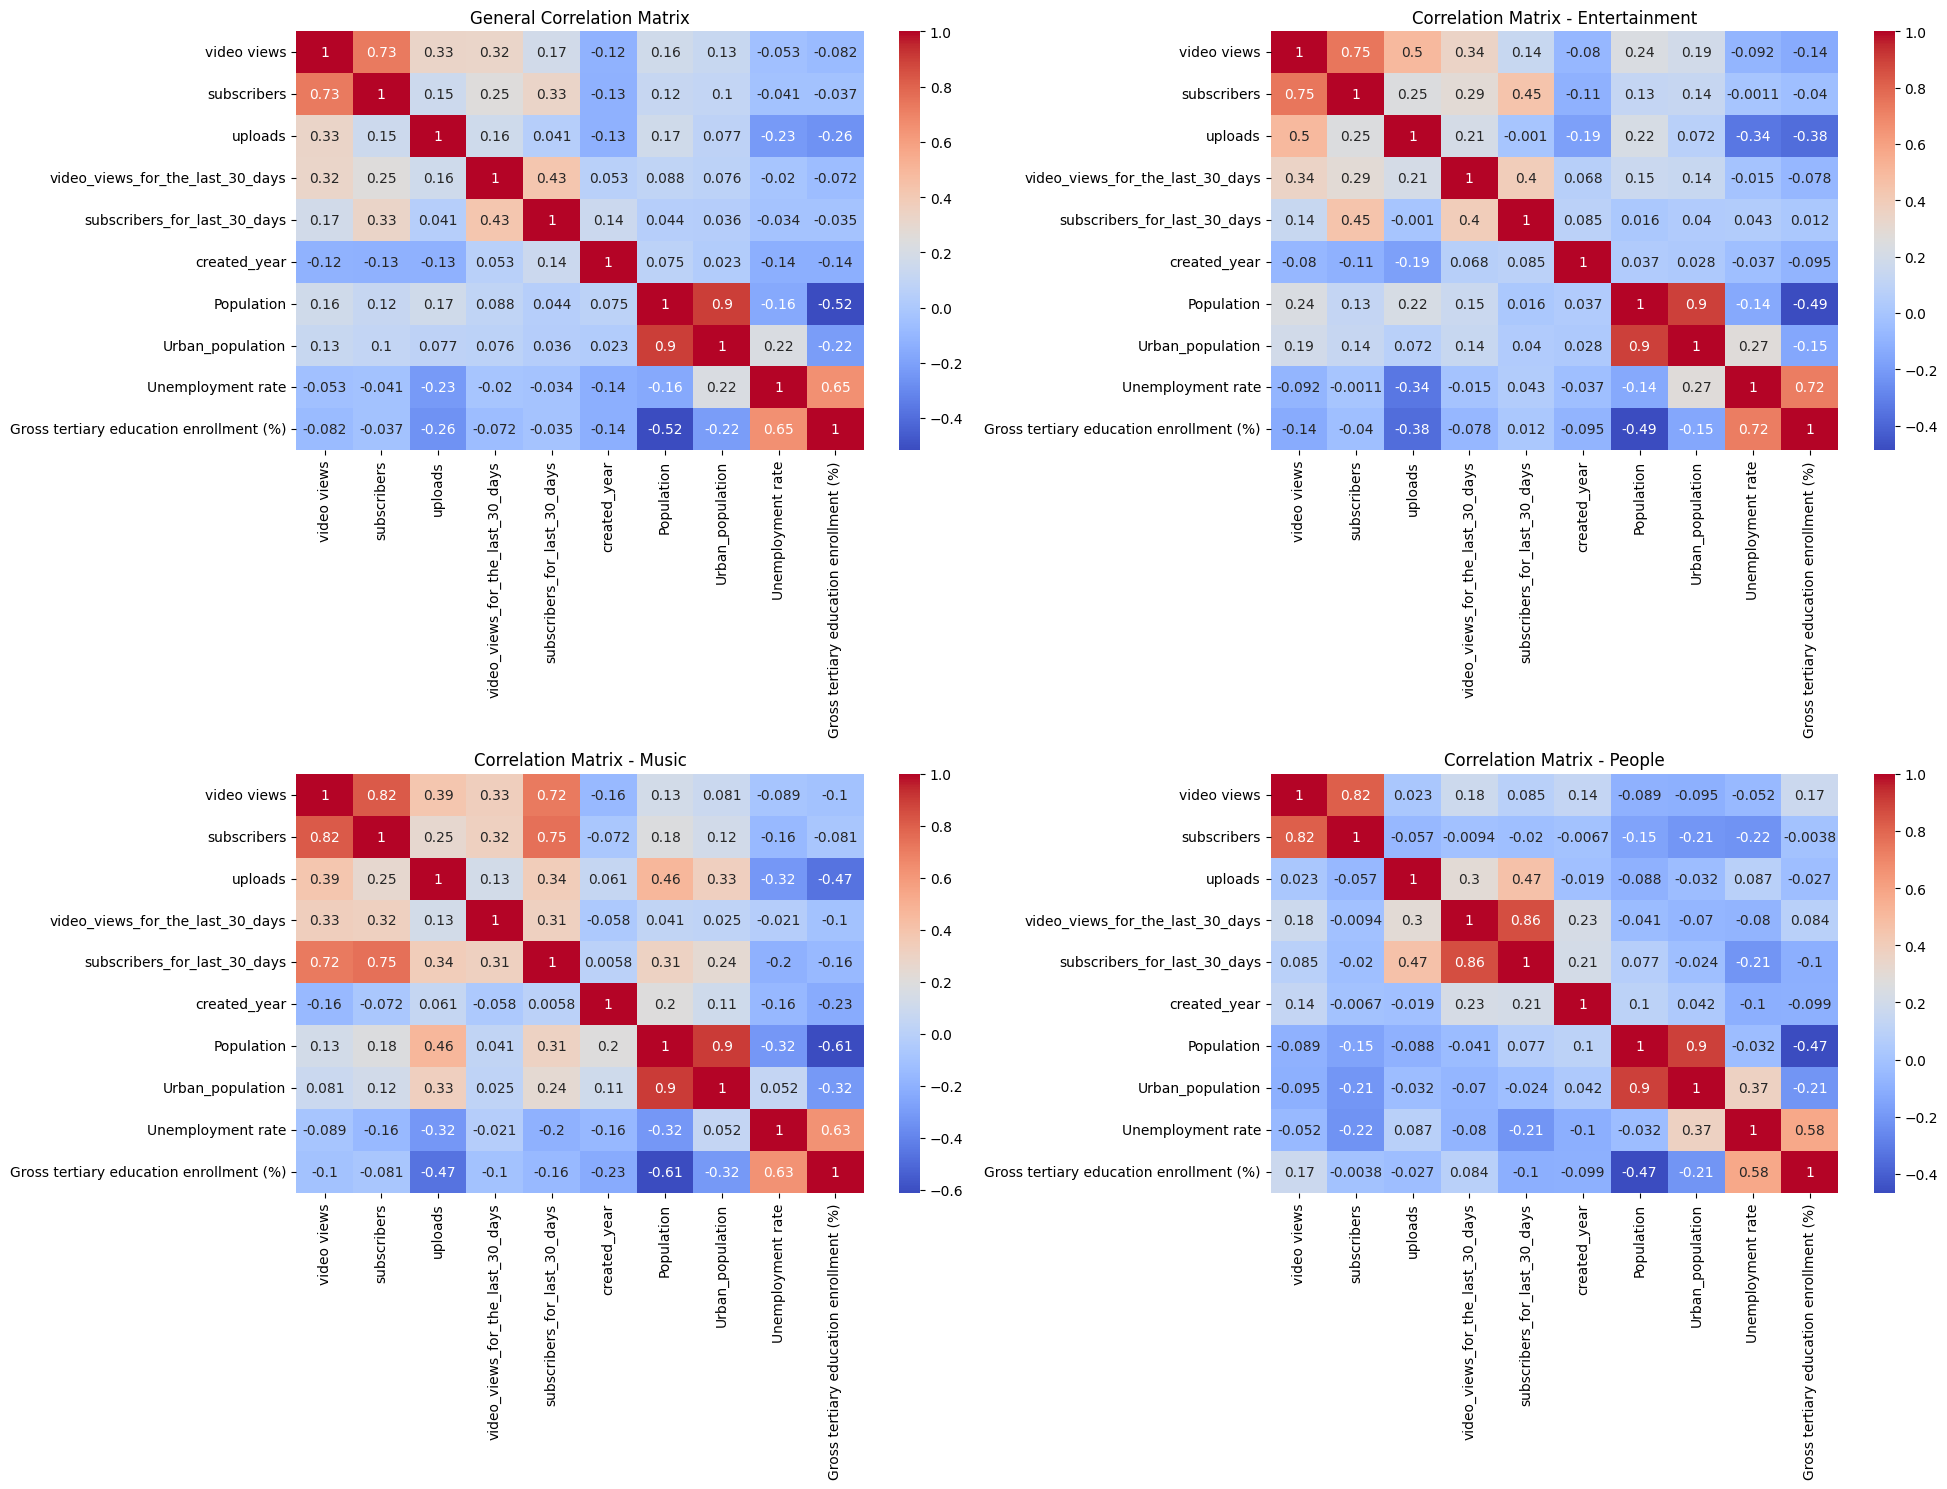

In [135]:
df = filtered_df
channel_types = ['Entertainment', 'Music', 'People']
# columns_to_include = ['video views', 'subscribers', 'uploads', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
#        'highest_yearly_earnings','subscribers_for_last_30_days','created_year', 'Population', 'Urban_population', 'Unemployment rate', 'Gross tertiary education enrollment (%)']

columns_to_include = ['video views', 'subscribers', 'uploads', 'video_views_for_the_last_30_days','subscribers_for_last_30_days','created_year', 'Population', 'Urban_population', 'Unemployment rate', 'Gross tertiary education enrollment (%)']

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

corr_matrix_general = df[columns_to_include].corr()
sns.heatmap(corr_matrix_general, annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('General Correlation Matrix')

# channel_types = df['channel_type'].unique()
for i, channel_type in enumerate(channel_types):
    subset_df = df[df['channel_type'] == channel_type][columns_to_include]
    corr_matrix = subset_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[(i+1)//2, (i+1)%2])
    axes[(i+1)//2, (i+1)%2].set_title(f'Correlation Matrix - {channel_type}')

plt.tight_layout()
plt.show()


Some insights that can be seen here are: 
1. In general, the covariance between Subscribers and Video Views is 0.73. But, in the case of Music and People, this number is greater, and reaches about 0.82. On the other hand, even after being a bigger category (with more number of channels), the covariance value for Entertainment is close the general value of 0.75.
2. In case of uploads wrt to subscribers in general there is a no standout correlation. However in Music and Entertainment this value is signficantly larger. This can help to infer that a large number of subscribers get added to music and entertainment channels only if they are putting on new music on a regular basis. For rest of the categories in general spamming uploads as a means to get subscriber wont help to grow the channel unless your channel is in music or entertainment. On the other hand, the trend for the People category is far from the general. In fact, the covariance is slightly negative (although negligible). This shows that the number of uploads make no difference to the subscribers for the channels in the People category.
3. Another case similar to 2 can be seen in case of population of a place and subscribers in the last 30 days where the general trend suggests that there is near zero correlation (or negative correaltion), however in case of categories like Music has a large enough correlation which means that addition of population can help in growth of these categories automatically as recent data suggests. 

The 1st conclusion from the above aggregate statistics shows that the Entertainment Category is a little different than the other categories. Next, we'll take a look at the Entertainment Category.


The correlation between the number of subscribers and video views is weak for the Entertainment Category as compared to the other bigger categories. We can take a look at the how the channel views are distributed with respect to the channel category rank (by subscribers - lower rank equals more subscribers)

In [136]:
filtered_data = data_table[data_table['channel_type'] == 'Entertainment']

filtered_data["entertainment_rank"] = np.array(data_table[data_table['channel_type'] == 'Entertainment'].reset_index().index) + 1
filtered_data = filtered_data.sort_values(by='video views', ascending=False)
plot_data = pd.DataFrame({'y': filtered_data["entertainment_rank"], 'x': np.array(range(len(filtered_data))) + 1})

hoverinfo = filtered_data[['Youtuber']]

fig = px.scatter(plot_data, x='x', y='y', title='Scatterplot for Entertainment Channel Type',
                 labels={'x': 'Video Views Rank', 'y': 'Subscriber Rank'},
                 hover_data={'x': True, 'y': True, 'Channel': hoverinfo.to_dict('list')['Youtuber']},
                 trendline='ols')

y_x = np.array(range(len(filtered_data))) + 1

fig.add_trace(go.Scatter(x=plot_data['x'], y=y_x, mode='lines', name='Identity Line'))

fig.update_layout(height=1000, width=1200)

fig.show()

In [138]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=42)
clust_data = km.fit_predict(X=plot_data)
clust_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plot_data_clust = plot_data.copy()
plot_data_clust['cluster'] = [clust_labels[i] for i in clust_data]

fig = px.scatter(plot_data_clust, x='x', y='y', color='cluster',
                 title='Clustering for Entertainment Channel Type',
                 labels={'x': 'Video Views Rank', 'y': 'Subscriber Rank', 'cluster': 'Cluster'},
                 color_discrete_sequence=['red', 'green', 'blue', 'magenta'])

y_x = np.array(range(len(filtered_data))) + 1
fig.add_trace(go.Scatter(x=plot_data['x'], y=y_x, mode='lines', name='Identity Line'))

legend_title = 'Clusters'

fig.update_layout(
    legend_title_text=legend_title,
    legend_tracegroupgap=25
)
fig.update_layout(height=1000, width=1200)

fig.show()

In [139]:
filtered_data = data_table[data_table['channel_type'] == 'Music']

filtered_data["Music_rank"] = np.array(data_table[data_table['channel_type'] == 'Music'].reset_index().index) + 1
filtered_data = filtered_data.sort_values(by='video views', ascending=False)
plot_data = pd.DataFrame({'y': filtered_data["Music_rank"], 'x': np.array(range(len(filtered_data))) + 1})

hoverinfo = filtered_data[['Youtuber']]

fig = px.scatter(plot_data, x='x', y='y', title='Scatterplot for Music Channel Type',
                 labels={'x': 'Video Views Rank', 'y': 'Subscriber Rank'},
                 hover_data={'x': True, 'y': True, 'Channel': hoverinfo.to_dict('list')['Youtuber']},
                 trendline='ols')

y_x = np.array(range(len(filtered_data))) + 1
fig.add_trace(go.Scatter(x=plot_data['x'], y=y_x, mode='lines', name='Identity Line'))

fig.update_layout(height=1000, width=1200)

fig.show()

In [140]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=42)
clust_data = km.fit_predict(X=plot_data)
clust_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plot_data_clust = plot_data.copy()
plot_data_clust['cluster'] = [clust_labels[i] for i in clust_data]

fig = px.scatter(plot_data_clust, x='x', y='y', color='cluster',
                 title='Clustering for Music Channel Type',
                 labels={'x': 'Video Views Rank', 'y': 'Subscriber Rank', 'cluster': 'Cluster'},
                 color_discrete_sequence=['red', 'green', 'blue', 'magenta'])

y_x = np.array(range(len(filtered_data))) + 1
fig.add_trace(go.Scatter(x=plot_data['x'], y=y_x, mode='lines', name='Identity Line'))

legend_title = 'Clusters'

fig.update_layout(
    legend_title_text=legend_title,
    legend_tracegroupgap=25
)
fig.update_layout(height=1000, width=1200)

fig.show()

These trends might be also affected by the age of the channel, for this we will edit our data table to get attributes for the channel age. This attribute will be similar to the one used in A1.

In [142]:
A1_table = pd.read_csv('Global YouTube Statistics_Global YouTube Statistics.csv', encoding='utf-16', sep='\t')
A1_table.reset_index(drop= True, inplace= True)
A1_table.shape

(995, 56)

In [143]:
#remove special characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

A1_table = A1_table.copy()
#Youtuber feature
A1_table['Youtuber'] = A1_table['Youtuber'].apply(lambda x: re.sub(pattern, '', x)) 
A1_table['Youtuber'] = A1_table['Youtuber'].str.strip() 
A1_table['Youtuber'] = A1_table['Youtuber'].str.lstrip('- ') 

In [144]:
corrupted_names = A1_table[A1_table['Youtuber'] == '']
corrupted_names.shape
A1_table = A1_table.drop(corrupted_names.index)
A1_table.reset_index(drop= True, inplace= True)

In [145]:
A1_table.shape

(979, 56)

In [146]:
data_table.shape

(979, 28)

In [147]:
data_table['Youtuber'].describe()

count        979
unique       977
top       Beyonc
freq           2
Name: Youtuber, dtype: object

In [148]:
data_table_new = pd.merge(data_table, A1_table, on='Youtuber', how='left', suffixes=('', '_a1'))

In [149]:
data_table_new.drop(columns=[col for col in data_table_new.columns if (col.endswith('_a1') or col.endswith('(copy)'))], inplace=True)

In [150]:
del A1_table, data_table
gc.collect()

765

In [178]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Violin Plot for Music', 'Violin Plot for the Entertainment'], shared_yaxes=True)

violin_subscribers = px.violin(
    data_table_new[data_table_new['channel_type'] == 'Music'],
    y='Days Since Created',
    box=True,
    title='Violin Plot for Subscribers',
    color_discrete_sequence=['orange']
)
fig.add_trace(violin_subscribers['data'][0], row=1, col=1)

violin_video_views = px.violin(
    data_table_new[data_table_new['channel_type'] == 'Entertainment'],
    y='Days Since Created',
    box=True,
    title='Violin Plot for Video Views',
    color_discrete_sequence=['blue']
)
fig.add_trace(violin_video_views['data'][0], row=1, col=2)

fig.update_layout(showlegend=False, height=1000, width=1500, title='Days Since Created Comparison')

fig.show()

In [152]:
columns_for_ml = [
    'subscribers',
    'video views',
    # 'category',
    'Country',
    'uploads',
    'channel_type',
    'video_views_for_the_last_30_days',
    'lowest_monthly_earnings',
    'highest_monthly_earnings',
    'lowest_yearly_earnings',
    'highest_yearly_earnings',
    'subscribers_for_last_30_days',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Unemployment rate',
    'Urban_population',
    'Days Since Created',
    # 'Avg Daily Subscribers',
    'Avg Daily Views',
    # 'Avg Monthly Subscribers',
    'Avg Monthly Views',
    'View per Video'
]

In [42]:
data_table_ml = data_table_new[columns_for_ml]

In [43]:
from sklearn.preprocessing import LabelEncoder

In [153]:
from lightgbm import LGBMRegressor

In [154]:
LGBM = LGBMRegressor(random_state=42)
LGBM.fit(X=data_table_ml.drop(columns='subscribers'), y=data_table_ml['subscribers'])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 579, number of used features: 18
[LightGBM] [Info] Start training from score 24340414.507772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(random_state=42)

In [155]:
df = pd.DataFrame({
    "features": data_table_ml.drop(columns='subscribers').columns,
    "feature importances": LGBM.feature_importances_/LGBM.feature_importances_.sum()
})

In [156]:
# Sample data
labels = df['features']
values = df['feature importances']

# Create a stacked bar chart
fig = go.Figure()

fig = px.pie(labels=labels, values=values, title='Feature Importances for Subscribers Prediction', names=labels)

fig.update_layout(
    height=800,
    width=1000
)
# Show the chart
fig.show()

In [157]:
countries_to_keep = [
    'United States',
    'India',
    'Brazil',
    'United Kingdom',
    'Mexico',
    'Indonesia',
    'Spain'
]

In [158]:
data_table_new = data_table_new[data_table_new['Country'].isin(countries_to_keep)]

In [162]:
data_table_new = data_table_new[data_table_new['Youtuber'] != 'YouTube']

In [163]:
data_table_new.drop(index=1, inplace=True)

In [164]:
data_table_new['Country Labels'] = LabelEncoder().fit_transform(data_table_new['Country'])

In [171]:
columns_to_include = ['video views', 'subscribers', 'uploads', 'Country Labels', 'Unemployment rate', 'Gross tertiary education enrollment (%)']

In [172]:
fig = px.parallel_coordinates(data_table_new[columns_to_include].dropna(), color='Country Labels', labels={"Youtuber": "Youtuber",
                "Subscribers": "Subscribers", "Video_Views": "Video Views",
                "Uploads": "Uploads", "Days_Since_Created": "Days Since Created",
                "Category": "Category"
                },
                width=1500,
                height=400#  color_continuous_scale=px.colors.diverging.Tealrose,
                )
fig.show()

In [173]:
data_table_india = data_table_new[data_table_new['Country'] == 'India']
data_table_us = data_table_new[data_table_new['Country'] == 'United States']

In [175]:
fig = make_subplots(1, 2, specs=[[{'type': 'domain'}, {'type': 'domain'}]], subplot_titles=('Category distribution India', 'Category distribution US'))

fig.add_trace(go.Pie(labels=data_table_india['channel_type'].value_counts().keys(), values=data_table_india['channel_type'].value_counts().values, name='India'), 1, 1)

fig.add_trace(go.Pie(labels=data_table_us['channel_type'].value_counts().keys(), values=data_table_us['channel_type'].value_counts().values, name='US'), 1, 2)

fig.update_layout(
    legend=dict(x=1, y=1.2, orientation='v'),
    width = 1000,
    height=750,
    title='Category distribution comparison'
)

fig.show()


In [176]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Violin Plot for India', 'Violin Plot for the US'], shared_yaxes=True)

violin_subscribers = px.violin(
    data_table_india,
    y='Days Since Created',
    box=True,
    title='Violin Plot for Subscribers',
    color_discrete_sequence=['orange']
)
fig.add_trace(violin_subscribers['data'][0], row=1, col=1)

violin_video_views = px.violin(
    data_table_us,
    y='Days Since Created',
    box=True,
    title='Violin Plot for Video Views',
    color_discrete_sequence=['blue']
)
fig.add_trace(violin_video_views['data'][0], row=1, col=2)

fig.update_layout(showlegend=False, height=1000, width=1500, title='Days Since Created Comparison')

fig.show()

In [179]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Violin Plot for India', 'Violin Plot for the US'], shared_yaxes=True)

violin_subscribers = px.violin(
    data_table_india,
    y='subscribers',
    box=True,
    title='Violin Plot for Subscribers',
    color_discrete_sequence=['orange']
)
fig.add_trace(violin_subscribers['data'][0], row=1, col=1)

violin_video_views = px.violin(
    data_table_us,
    y='subscribers',
    box=True,
    title='Violin Plot for Video Views',
    color_discrete_sequence=['blue']
)
fig.add_trace(violin_video_views['data'][0], row=1, col=2)

fig.update_layout(showlegend=False, height=1000, width=1500, title='Subscribers Comparison')

fig.show()